Proyecto 6 - Clasificador de imágenes con redes neuronales

**Cuaderno e Informe Técnico**

Este proyecto implementa una **Red Neuronal Profunda (DNN)** para resolver un problema de Clasificación Multiclase utilizando el **Conjunto de Datos MNIST** (Dígitos Manuscritos).

**Objetivo:**
Diseñar, entrenar y validar una arquitectura neuronal capaz de generalizar patrones a partir de datos de píxeles sin procesar, gestionando el equilibrio entre sesgo y varianza.

**Tecnología:**
* **Marco de trabajo:** TensorFlow / Keras.
* **Arquitectura:** Perceptrón Multicapa (MLP) / Capas Convolucionales.
* **Optimización:** Descenso de Gradiente Estocástico (SGD/Adam) y Retropropagación.

Imports necesarios para ejecutar el trabajo

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping
import time
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_history(history):
  loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
  val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
  acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
  val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

  if len(loss_list) == 0:
      print('Loss is missing in history')
      return

  ## As loss always exists
  epochs = range(1,len(history.history[loss_list[0]]) + 1)

  ## Loss
  fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
  for l in loss_list:
      axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
  for l in val_loss_list:
      axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

  axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
  axs[0].grid()
  axs[0].legend()

  ## Accuracy
  for l in acc_list:
      axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
  for l in val_acc_list:
      axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

  axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
  axs[1].grid()
  axs[1].legend()
  plt.show()

Carga del dataset MNIST

In [ ]:
verbose = True
use_CNN = False

print('Loading MNIST dataset...')
# Problem dimensions
img_rows, img_cols = 28, 28
num_pixels = img_rows * img_cols
num_classes = 10
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if use_CNN:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
else:
  x_train = x_train.reshape(60000, num_pixels)
  x_test = x_test.reshape(10000, num_pixels)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

np.random.seed(0)
p = np.arange(x_train.shape[0])
np.random.shuffle(p)
x_train = x_train[p]
y_train = y_train[p]


Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 784)
60000 train samples
10000 test samples


Ejemplo de definición de la arquitectura de una red y de los parámetros de la optimización.

In [ ]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
model = Sequential()
if use_CNN:
  # Red convolucional
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
else:
  # Perceptron de un solo nivel
  model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))


model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Código para entrenar la red neuronal utilizando la función FIT

Observa como incluye un argumento para hacer separación de datos de validación



Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6862 - loss: 1.1435 - val_accuracy: 0.8883 - val_loss: 0.4201
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8970 - loss: 0.3900 - val_accuracy: 0.9045 - val_loss: 0.3457
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9096 - loss: 0.3348 - val_accuracy: 0.9128 - val_loss: 0.3178
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9163 - loss: 0.3024 - val_accuracy: 0.9152 - val_loss: 0.3036
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9176 - loss: 0.2945 - val_accuracy: 0.9182 - val_loss: 0.2951
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9182 - loss: 0.2922 - val_accuracy: 0.9182 - val_loss: 0.2896
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9243 - loss: 0.2775 - val_accuracy: 0.9185 - val_loss: 0.2874
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9248 - loss: 0.2717 - val_accuracy: 0.

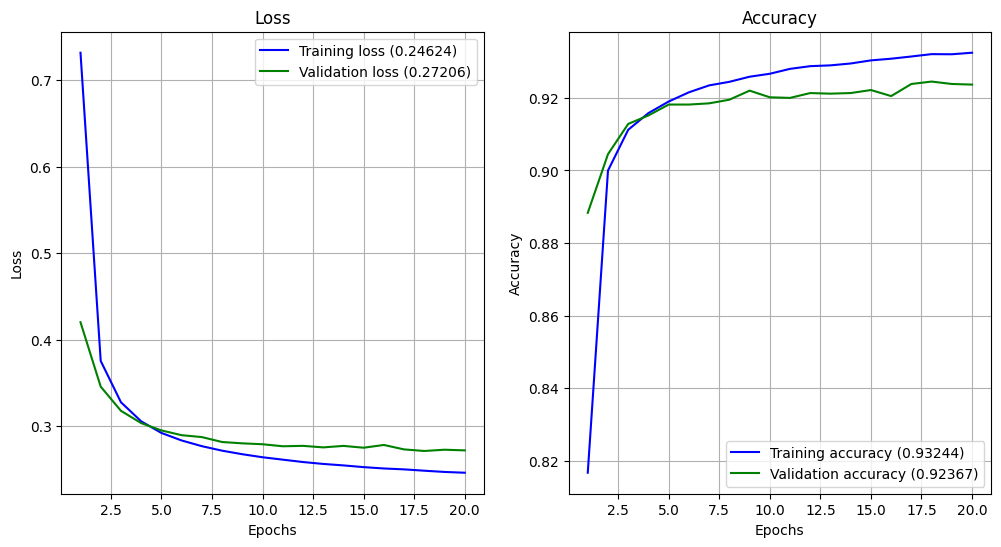

In [ ]:
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

## Preguntas a responder de la celda anterior


### 1 - ¿Qué representan los parámetros batch_size y epochs? (Respuesta dos líneas max).

batch_size define el número de ejemplos a dar a entrenar antes de actualizar los pesos del modelo, mientras que epochs indica el número de veces que el algoritmo procesa el conjunto de datos completo durante el entrenamiento.

### 2 - Explica las dos gráficas que se muestran al finalizar el entrenamiento.



**GRÁFICA LOSS**


---


La línea azul = training loss --> cómo de bien aprende el modelo con los datos de entrenamiento.

La línea verde = validation loss --> cómo de bien generaliza a datos que no ha visto.


---


Con los primeros 2-3 epoch, ambas líneas bajan muy rápido, eso implica a que el modelo está aprendiendo muchísimo. A partir de ahí, la bajada se vuelve cada vez más lenta (ya ha aprendido lo fácil e intenta mejorar con los detalles). La validation loss se mantiene muy parecida pero no hay sobreajuste serio. El modelo ha aprendido bien, y no ha habido sobreentrenamiento.



---



---


**GRÁFICA ACCURACY**


---
La línea azul = training accuracy --> precisión en entrenamiento.

La línea verde = validation accuracy --> precisión en validación.



---
Al principio la precisión sube muy rápido, el training accuracy entre el epoch 1 y el 5 ya pasa de 0,83 a 0,92, luego sigue subiendo mucho más lento pero sigue mejorando. Las dos curvas van casi juntas por lo que hay buena generalización. El rendimiento es estable.

Evaluación de la red

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()


def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_tst = [np.argmax(y) for y in y_test]
    y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)

Accuracy train:  93.33%
Accuracy test:   92.72%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization


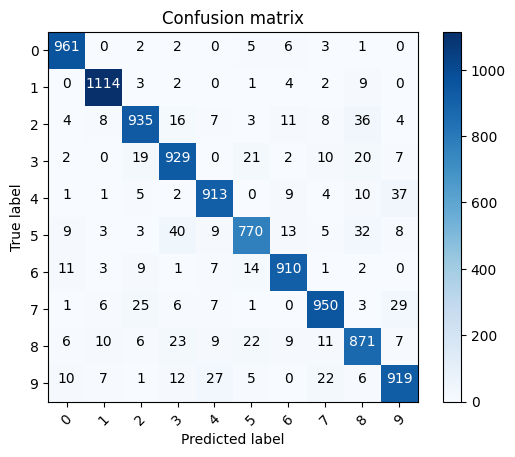

In [ ]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

## Preguntas a responder de la celda anterior

### 3 - Explica la gráfica que se muestra

La matriz de confusión indica cómo de bien ha clasificado el modelo cada dígito (0–9).

Filas = valor real

Columnas = valor predicho

Claramente los aciertos son aquellas celdas que forman la diagonal principal en forma de \\. Según los aciertos visibles en la gráfica y los porcentajes vistos en el Accuracy train y el Accuracy test, el agente tiene una tasa de acierto del 92-93%.

Distingue muy bien los símbolos fácilmente interpretables como el 1 y distingue un poco peor aquellos números cuyo símbolo es más complejo, como el 5.

Al agente le cuesta distinguir algunos números de otros, por ejemplo:
*   El 4 lo ha predicho como 9 (34 veces)
*   El 8 lo ha predicho como 9 (89 veces)
*   El 5 lo ha predicho como 3 (36 veces)
*   El 9 lo ha predicho como 8 (23 veces)

**4.Trabajo práctico**: incluimos a continuación las secciones de código para probar las diferentes redes.


4.1.   La mejor red obtenida para el caso de una capa

4.2.   La mejor red obtenida para el caso de dos capas

4.3.   La mejor red obtenida para el caso de tres capas

4.4.   Ejemplo de red en la que se produzca sobreajuste al entrenar

4.5.   Modificación de la red anterior utilizando técnicas para evitar el sobreajuste

4.6.   Ejecuta la red convolucional y compara el resultado con los obtenidos utilizando perceptrón.

4.7.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso (nº capas, nº neuronas, accuracy, técnicas de sobreajuste, etc.). Incluye en esta sección también las conclusiones obtenidas del trabajo.

4.8.   Recuerda mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.

4.9.   Opcional: Evalua el rendimiento de un MLP y una CNN en un dataset diferente (CIFAR10, CIFAR100, etc. Puedes ver más opciones de datasets para clasifición en imágenes en www.tensorflow.org/datasets/catalog/overview?hl=es)



In [ ]:
# CODIGO NECESARIO PARA RESPONDER LAS PREGUNTAS de la 4.1 a la 4.6

4.1. La mejor red obtenida para el caso de una capa


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7108 - loss: 1.0993 - val_accuracy: 0.8855 - val_loss: 0.4185
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8971 - loss: 0.3895 - val_accuracy: 0.9060 - val_loss: 0.3453
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9096 - loss: 0.3333 - val_accuracy: 0.9118 - val_loss: 0.3182
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9164 - loss: 0.3076 - val_accuracy: 0.9132 - val_loss: 0.3049
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.2894 - val_accuracy: 0.9172 - val_loss: 0.2971
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9222 - loss: 0.2832 - val_accuracy: 0.9168 - val_loss: 0.2897
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9235 - loss: 0.2810 - val_accuracy: 0.9177 - val_loss: 0.2882
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9245 - loss: 0.2734 - val_accuracy: 0.

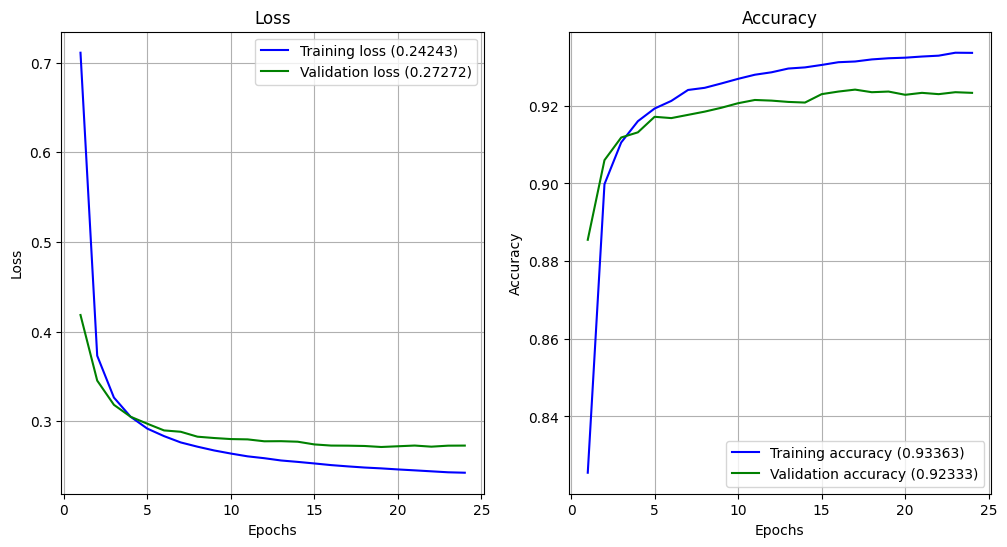

In [ ]:
print("4.1. La mejor red obtenida para el caso de una capa")

# 1. Definición del modelo
model_41 = Sequential()

# Añadimos una única capa
# 10 neuronas de salida (una por cada dígito 0-9).
# Activación 'softmax' es ideal para clasificación multiclase (probabilidades que suman 1).
# Input shape es el número de píxeles (784).
model_41.add(Dense(10, input_shape=(784,), activation='softmax'))

# 2. Compilación
# Loss: categorical_crossentropy es la estándar para clasificación multiclase.
# Optimizador: Adam suele dar mejores resultados que SGD por defecto.
model_41.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

# Mostramos resumen de la arquitectura.
model_41.summary()

# 3. Entrenamiento
# Usamos earlystop para parar si no mejora.
history_41 = model_41.fit(x_train, y_train,
                            batch_size=128,
                            epochs=50, # Damos margen, el earlystop parará antes si es necesario
                            validation_split=0.1,
                            callbacks=[earlystop],
                            verbose=verbose)

# 4. Evaluación y Resultados
print(f'\nResultados')
train_score_41 = model.evaluate(x_train, y_train, verbose=0)
test_score_41 = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_41[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test: ', 100*test_score_41[1], '%'))

# Visualización de la evolución del entrenamiento
plot_history(history_41)



4.2. La mejor red obtenida para el caso de dos capas


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8185 - loss: 0.6668 - val_accuracy: 0.9403 - val_loss: 0.2099
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9483 - loss: 0.1818 - val_accuracy: 0.9592 - val_loss: 0.1445
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9633 - loss: 0.1274 - val_accuracy: 0.9647 - val_loss: 0.1236
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9736 - loss: 0.0962 - val_accuracy: 0.9697 - val_loss: 0.1046
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9782 - loss: 0.0778 - val_accuracy: 0.9722 - val_loss: 0.0973
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9819 - loss: 0.0636 - val_accuracy: 0.9697 - val_loss: 0.1010
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0523 - val_accuracy: 0.9737 - val_loss: 0.0850
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9869 - loss: 0.0447 - val_accuracy: 0.

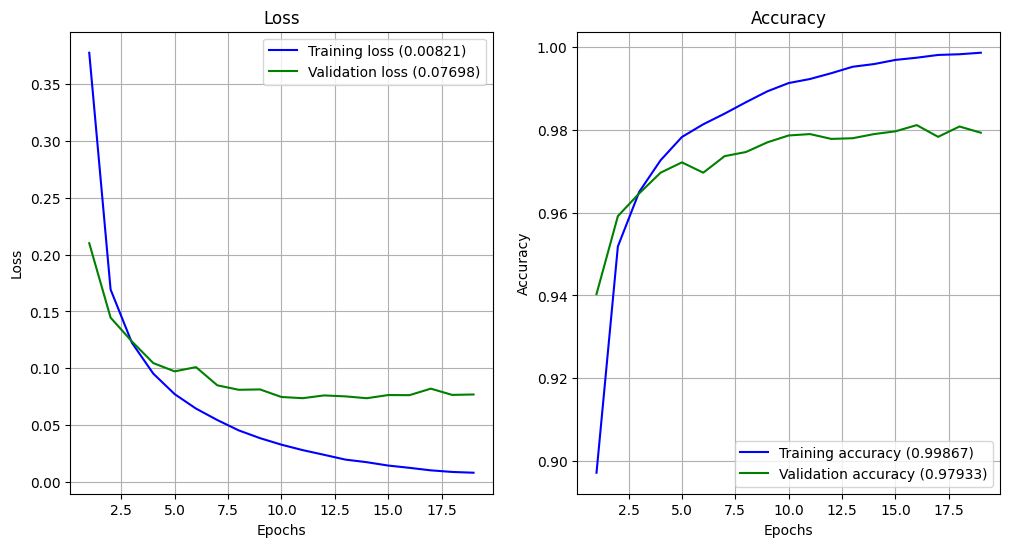

In [ ]:
print("4.2. La mejor red obtenida para el caso de dos capas")

# 1. Definición del modelo
model_42 = Sequential()

# Capa Oculta:
# Añadimos una capa con 128 neuronas.
# Activación 'relu' es la estándar para capas ocultas por su eficiencia y evitar desvanecimiento de gradiente.
# Input shape es el número de píxeles (784).
model_42.add(Dense(128, input_shape=(784,), activation='relu'))

# Capa de Salida:
# 10 neuronas (dígitos 0-9) con activación 'softmax'.
model_42.add(Dense(10, activation='softmax'))

# 2. Compilación
# Mantenemos Adam y categorical_crossentropy por su buen rendimiento.
model_42.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

model_42.summary()

# 3. Entrenamiento
history_42 = model_42.fit(x_train, y_train,
                            batch_size=128,
                            epochs=50, # El earlystop detendrá el entrenamiento si no mejora
                            validation_split=0.1,
                            callbacks=[earlystop],
                            verbose=verbose)

# 4. Evaluación y Resultados
print(f'\nResultados')
train_score_42 = model_42.evaluate(x_train, y_train, verbose=0)
test_score_42 = model_42.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_42[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score_42[1], '%'))

# Visualización
plot_history(history_42)

Por muy poca diferencia porcentual que había entre distintas configuraciones de números cercanos de neuronas, la mejor configuración de número de neuronas que he encontrado ha sido con 128 neuronas en la capa oculta.

4.3. La mejor red obtenida para el caso de tres capas


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8732 - loss: 0.4483 - val_accuracy: 0.9640 - val_loss: 0.1221
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9723 - loss: 0.0926 - val_accuracy: 0.9715 - val_loss: 0.0919
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9826 - loss: 0.0573 - val_accuracy: 0.9790 - val_loss: 0.0727
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9876 - loss: 0.0387 - val_accuracy: 0.9773 - val_loss: 0.0793
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9802 - val_loss: 0.0703
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9812 - val_loss: 0.0654
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9953 - loss: 0.0152 - val_accuracy: 0.9753 - val_loss: 0.1018
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9946 - loss: 0.0152 - val_ac

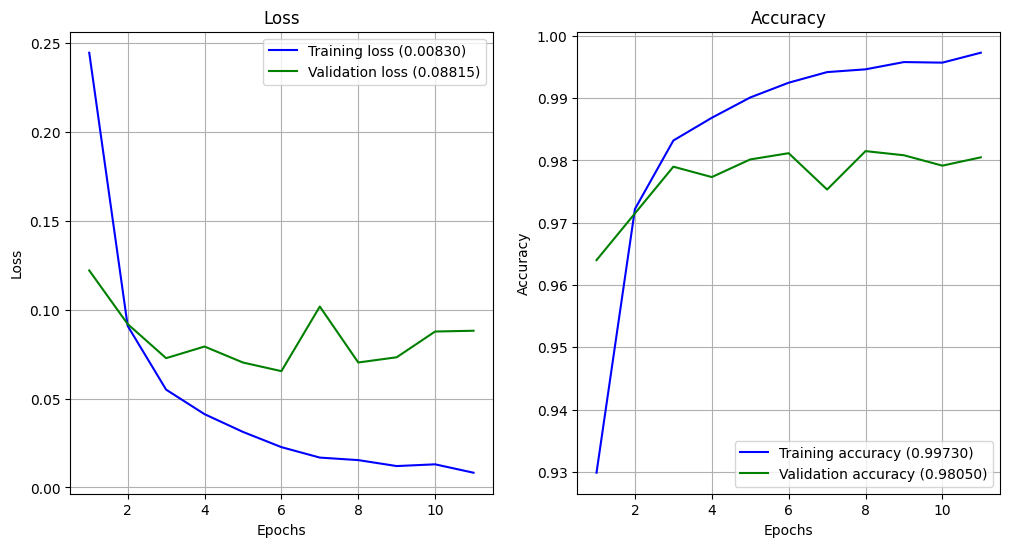

In [ ]:
print("4.3. La mejor red obtenida para el caso de tres capas")

# 1. Definición del modelo
model_43 = Sequential()

# Primera Capa Oculta:
# Aumentamos a 512 neuronas para capturar un gran número de características iniciales.
model_43.add(Dense(512, input_shape=(784,), activation='relu'))

# Segunda Capa Oculta:
# Reducimos a 128 neuronas. Esta estructura de "embudo" condensa la información
# aprendida en la capa anterior.
model_43.add(Dense(128, activation='relu'))

# Capa de Salida:
model_43.add(Dense(10, activation='softmax'))

# 2. Compilación
model_43.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

# Resumen: Observa cómo se distribuyen los parámetros entre capas
model_43.summary()

# 3. Entrenamiento
history_43 = model_43.fit(x_train, y_train,
                            batch_size=128,
                            epochs=50,
                            validation_split=0.1,
                            callbacks=[earlystop],
                            verbose=verbose)

# 4. Evaluación y Resultados
print(f'\nResultados')
train_score_43 = model_43.evaluate(x_train, y_train, verbose=0)
test_score_43 = model_43.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_43[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score_43[1], '%'))

# Visualización
plot_history(history_43)

Entre las distintas combinaciones probadas, la más efectiva fue la de 512  y 128 para las capas ocultas respectivamente.

4.4. Ejemplo de red en la que se produzca sobreajuste al entrenar


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 1500)           │     1,177,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,192,510 (4.55 MB)

 Trainable params: 1,192,510 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8800 - loss: 0.4051 - val_accuracy: 0.9662 - val_loss: 0.1178
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9723 - loss: 0.0914 - val_accuracy: 0.9748 - val_loss: 0.0809
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9838 - loss: 0.0552 - val_accuracy: 0.9775 - val_loss: 0.0740
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9892 - loss: 0.0349 - val_accuracy: 0.9788 - val_loss: 0.0706
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9929 - loss: 0.0248 - val_accuracy: 0.9817 - val_loss: 0.0649
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9952 - loss: 0.0168 - val_accuracy: 0.9822 - val_loss: 0.0652
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accuracy: 0.9802 - val_loss: 0.0718
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9971 - loss: 0.0109 - 

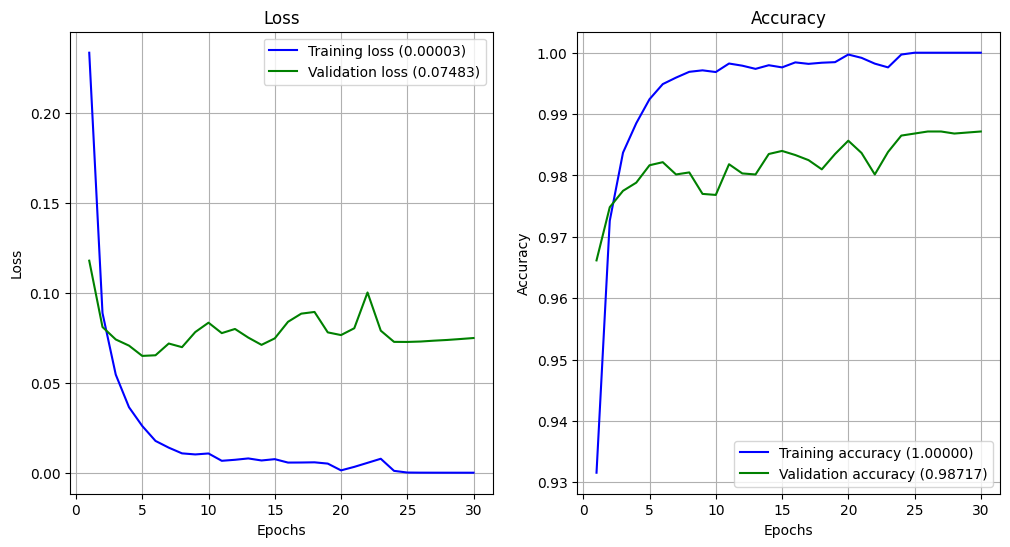

In [ ]:
print("4.4. Ejemplo de red en la que se produzca sobreajuste al entrenar")

# 1. Definición del modelo
model_44 = Sequential()

# Capa Oculta excesiva:
# Usamos 1500 neuronas para dar al modelo capacidad de sobra para memorizar
# los datos de entrenamiento (casi 1.2 millones de parámetros).
model_44.add(Dense(1500, input_shape=(784,), activation='relu'))

# Capa de Salida:
model_44.add(Dense(10, activation='softmax'))

# 2. Compilación
model_44.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

model_44.summary()

# 3. Entrenamiento
# Eliminamos "earlystop" y ponemos muchas epochs.
# Esto forzará a que la 'Validation Loss' empiece a subir (empeorar) mientras
# la 'Training Loss' sigue bajando.
history_44 = model_44.fit(x_train, y_train,
                            batch_size=128,
                            epochs=30,
                            validation_split=0.1,
                            callbacks=[], # Lista vacía: No usamos EarlyStopping
                            verbose=verbose)

# 4. Evaluación y Resultados
print(f'\nResultados')
train_score_44 = model_44.evaluate(x_train, y_train, verbose=0)
test_score_44 = model_44.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_44[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score_44[1], '%'))

plot_history(history_44)

4.5. Modificación de la red anterior utilizando técnicas para evitar el sobreajuste


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 1500)           │     1,177,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,192,510 (4.55 MB)

 Trainable params: 1,192,510 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8615 - loss: 0.4676 - val_accuracy: 0.9618 - val_loss: 0.1329
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9605 - loss: 0.1305 - val_accuracy: 0.9693 - val_loss: 0.1007
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9725 - loss: 0.0919 - val_accuracy: 0.9768 - val_loss: 0.0788
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9780 - loss: 0.0717 - val_accuracy: 0.9780 - val_loss: 0.0752
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9815 - loss: 0.0609 - val_accuracy: 0.9783 - val_loss: 0.0703
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9839 - loss: 0.0503 - val_accuracy: 0.9827 - val_loss: 0.0596
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9864 - loss: 0.0422 - val_accuracy: 0.9818 - val_loss: 0.0594
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9881 - loss: 0.0387 - 

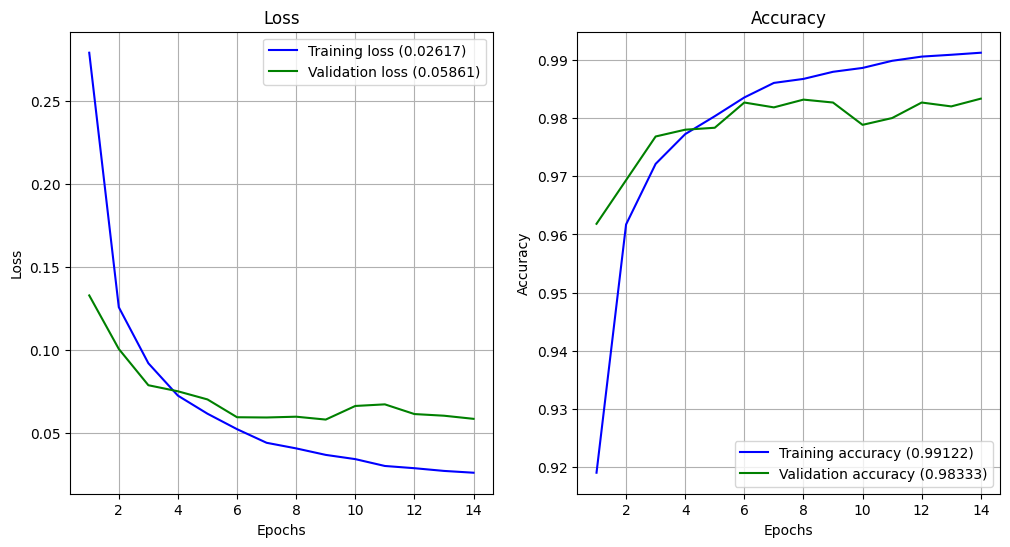

In [ ]:
print("4.5. Modificación de la red anterior utilizando técnicas para evitar el sobreajuste")

# 1. Definición del modelo
model_45 = Sequential()

# Capa Oculta: Mantenemos las 1500 neuronas del ejercicio anterior
# para demostrar que se puede controlar el sobreajuste incluso en redes grandes.
model_45.add(Dense(1500, input_shape=(784,), activation='relu'))

# TÉCNICA 1: Dropout
# Añadimos una capa de Dropout del 50%.
# Esto "apaga" aleatoriamente la mitad de las neuronas en cada actualización,
# impidiendo que la red se vuelva dependiente de caminos específicos (memorización).
model_45.add(Dropout(0.5))

# Capa de Salida
model_45.add(Dense(10, activation='softmax'))

# 2. Compilación
model_45.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

model_45.summary()

# 3. Entrenamiento
# TÉCNICA 2: Recuperamos el "earlystop".
# Esto cortará el entrenamiento automáticamente si la validación deja de mejorar,
# evitando que la curva de 'Validation loss' empiece a subir.
history_45 = model_45.fit(x_train, y_train,
                            batch_size=128,
                            epochs=50, # Ponemos margen, el callback lo parará antes
                            validation_split=0.1,
                            callbacks=[earlystop], # Activamos earlystop
                            verbose=verbose)

# 4. Evaluación y Resultados
print(f'\nResultados')
train_score_45 = model_45.evaluate(x_train, y_train, verbose=0)
test_score_45 = model_45.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_45[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score_45[1], '%'))

# Visualización
plot_history(history_45)

4.6. Ejecuta la red convolucional y compara el resultado con los obtenidos utilizando perceptrón


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 146s 331ms/step - accuracy: 0.8398 - loss: 0.5019 - val_accuracy: 0.9827 - val_loss: 0.0616
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 129s 302ms/step - accuracy: 0.9746 - loss: 0.0882 - val_accuracy: 0.9860 - val_loss: 0.0486
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 126s 299ms/step - accuracy: 0.9797 - loss: 0.0691 - val_accuracy: 0.9870 - val_loss: 0.0414
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 129s 305ms/step - accuracy: 0.9824 - loss: 0.0529 - val_accuracy: 0.9885 - val_loss: 0.0385
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 124s 293ms/step - accuracy: 0.9869 - loss: 0.0416 - val_accuracy: 0.9903 - val_loss: 0.0351
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 125s 297ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9893 - val_loss: 0.0383
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 299ms/step - accuracy: 0.9890 - loss: 0.0333 - val_accuracy: 0.9913 - val_loss: 0.0381
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 127s 300ms/step - accuracy: 0.9903 -

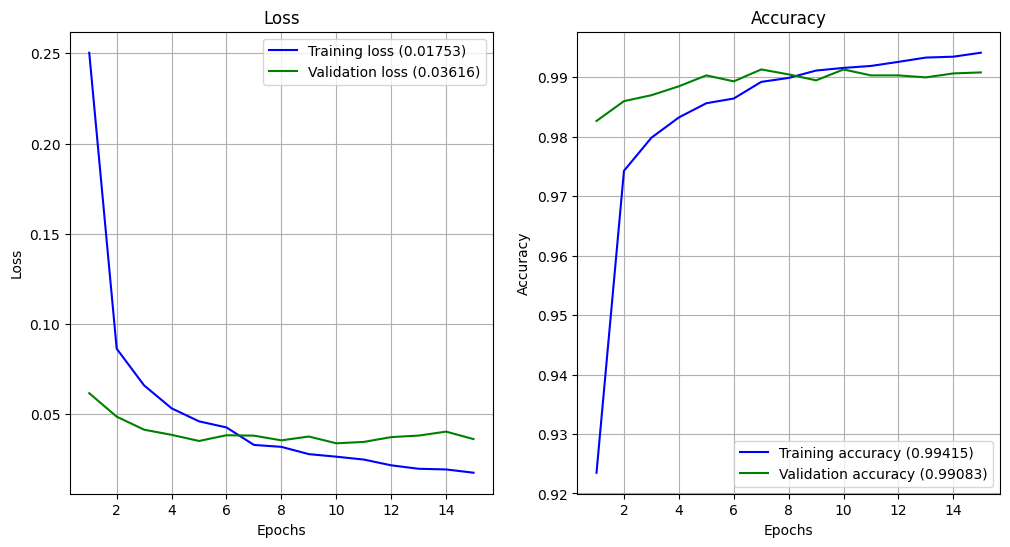

In [ ]:
print("4.6. Ejecuta la red convolucional y compara el resultado con los obtenidos utilizando perceptrón")

# Preparamos los datos de la convolución para que tengan la forma (28, 28, 1) en lugar de (784,)
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1) # variable necesaria para la primera capa

# Creamos copias de los datos con la forma correcta para no romper los ejercicios anteriores
x_train_cnn = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# 1. Definición del modelo
model_46 = Sequential()

# Red convolucional
model_46.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_46.add(Conv2D(64, (3, 3), activation='relu'))
model_46.add(MaxPooling2D(pool_size=(2, 2)))
model_46.add(Dropout(0.25))
model_46.add(Flatten())
model_46.add(Dense(128, activation='relu'))
model_46.add(Dropout(0.5))
model_46.add(Dense(10, activation='softmax')) # num_classes es 10

# 2. Compilación
model_46.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

model_46.summary()

# 3. Entrenamiento
# Usamos los datos redimensionados (x_train_cnn)
history_46 = model_46.fit(x_train_cnn, y_train,
                            batch_size=128,
                            epochs=50, # Dejamos margen para que actúe el earlystop
                            validation_split=0.1,
                            callbacks=[earlystop],
                            verbose=verbose)

# 4. Evaluación y Resultados
print(f'\nResultados')
train_score_46 = model_46.evaluate(x_train_cnn, y_train, verbose=0)
test_score_46 = model_46.evaluate(x_test_cnn, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_46[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score_46[1], '%'))

# Visualización
plot_history(history_46)

### 4 - Respuestas a las preguntas 4.7 y 4.8

**4.7.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso (nº capas, nº neuronas, accuracy, técnicas de sobreajuste, etc.). Incluye en esta sección también las conclusiones obtenidas del trabajo.**


---





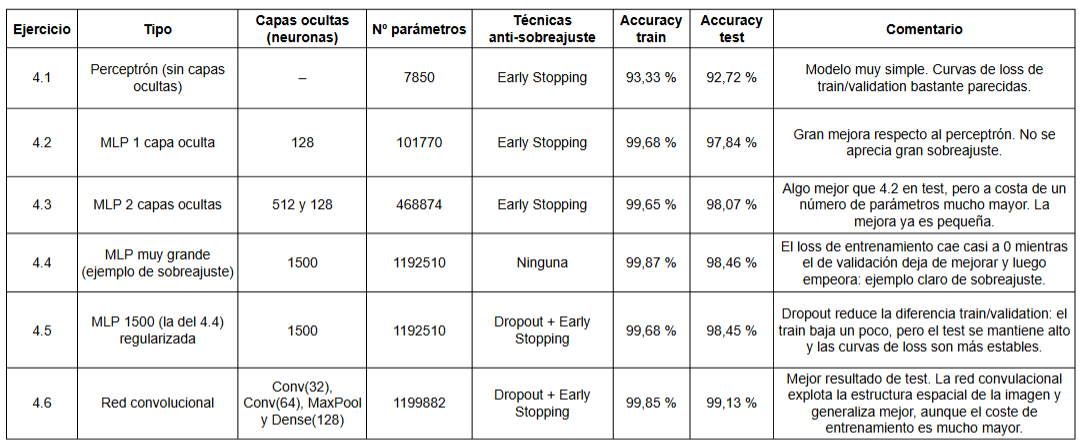

En conjunto, las pruebas muestran que aumentar la complejidad del modelo mejora el rendimiento solo hasta cierto punto: pasar del perceptrón simple a redes con una o dos capas ocultas incrementa claramente la accuracy, pero añadir demasiadas neuronas provoca sobreajuste, como se observa en el modelo grande de 1500 neuronas. El uso de técnicas como Early Stopping y Dropout permite reducir este problema y mantener un buen equilibrio entre aprendizaje y generalización. Aun así, la red que mejor resultado obtiene es la convolucional, que aprovecha la estructura espacial de las imágenes y alcanza la mayor accuracy en test (aproximadamente 99 %), aunque requiere más tiempo de entrenamiento. En conclusión, la red convulacional es la opción más eficaz, mientras que el MLP de una capa oculta ofrece un rendimiento muy parecido con menor complejidad.

**4.8.   Mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.**


---



4.8. Ejemplo de imagen mal clasificada por la mejor red
Total de errores encontrados: 87 de 10000


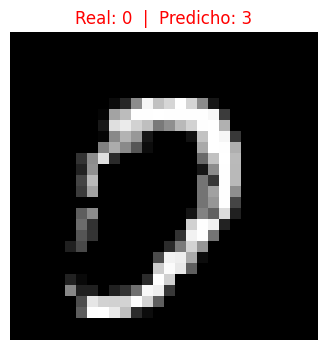

Probabilidades asignadas por la red para la imagen 6597:
 - 0: 0.00%
 - 1: 0.00%
 - 2: 0.00%
 - 3: 96.71%
 - 4: 0.00%
 - 5: 0.00%
 - 6: 0.00%
 - 7: 1.15%
 - 8: 0.00%
 - 9: 2.14%


In [42]:
import numpy as np
import matplotlib.pyplot as plt

print("4.8. Ejemplo de imagen mal clasificada por la mejor red")

# 1. Obtener predicciones sobre todo el set de test
predictions = model_46.predict(x_test_cnn, verbose=0)

# 2. Convertir probabilidades a etiquetas (0-9)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# 3. Encontrar los índices donde la red falló
# (Donde la predicción no coincide con la etiqueta real)
mistakes = np.where(pred_labels != true_labels)[0]
print(f"Total de errores encontrados: {len(mistakes)} de {len(x_test)}")

# 4. Seleccionar y visualizar un error al azar
if len(mistakes) > 0:
    # Elegimos uno al azar
    idx = np.random.choice(mistakes)

    # Preparamos la imagen (quitamos el canal de color extra para pintar)
    img_error = x_test_cnn[idx].reshape(28, 28)

    # Mostramos la imagen
    plt.figure(figsize=(4, 4))
    plt.imshow(img_error, cmap='gray')
    plt.title(f"Real: {true_labels[idx]}  |  Predicho: {pred_labels[idx]}", color='red')
    plt.axis('off')
    plt.show()

    # Mostramos las probabilidades que dio la red para confirmar la confusión
    print(f"Probabilidades asignadas por la red para la imagen {idx}:")
    for i, prob in enumerate(predictions[idx]):
        print(f" - {i}: {prob*100:.2f}%")
else:
    print("¡Increíble! No hay errores (la red es perfecta o algo falló en la búsqueda).")

El error es claramente debido a que la imagen del 0 no está totalmente cerrada y no forma el símbolo completamente, sin embargo, para la vista y razonamiento humano, es claro que estamos viendo un cero, pero la IA se equivoca. Esto puede deberse a los patrones que ha aprendido con los datos dados durante su fase de aprendizaje, pero lo que es preocupante es que la red convulacional le da un 96,71 % de propabilidades de ser un 3 y ni siquiera se replantea que la imagen pueda representar un 0. Esto nos indica que deberíamos preparar a la red en su entrenamiento para que pueda tratar y detectar más correctamente la ambigüedad humana en la escritura mediante nuevos datos relacionados que complementen estos casos.